# Checking Accidents With and Without Red Light camera

In [114]:
# Add Matplotlib inline magic command
%matplotlib notebook
%matplotlib inline
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.io as pio
import plotly.graph_objects as go

In [115]:
#importing files
all_collision=pd.read_csv("../Resources/df_all_collision.csv")
seriously_injured=pd.read_csv("../Resources/df_seriously_injured.csv",low_memory=False)
red_light_camera=pd.read_csv("../Resources/df_red_light_camera.csv")

In [116]:
#creating copy of data
red_light_camera_df=red_light_camera.copy()
seriously_injured_df=seriously_injured.copy()
all_collision_df=all_collision.copy()

In [117]:
pd.options.display.max_columns = None         # to print all columns

# MERGE1: TO GET DATA FOR AREAS WITH RED LIGHT CAMERAS ONLY

In [118]:
#Checking data before merging
red_light_camera_df.head()

,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month,Year
0,2007-11-09,Richmond St E And Parliament St,Toronto and East York,6001,-79.3640,43.6545,November,2007
1,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007
2,2007-11-09,Steeles Ave W And Carpenter Rd / Private Acces...,North York,6003,-79.4475,43.7920,November,2007
3,2007-11-09,Steeles Ave W And Hilda Ave,North York,6004,-79.4292,43.7960,November,2007
4,2007-11-09,Albion Rd And Silverstone Dr,Etobicoke York,6005,-79.6000,43.7429,November,2007


In [119]:
#Getting red_light_camera_df info
red_light_camera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACTIVATION_DATE  214 non-null    object 
 1   NAME             214 non-null    object 
 2   DISTRICT         214 non-null    object 
 3   RLC              214 non-null    int64  
 4   Longitude        214 non-null    float64
 5   Latitude         214 non-null    float64
 6   Month            214 non-null    object 
 7   Year             214 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 13.5+ KB


In [120]:
seriously_injured_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ACCNUM              6001 non-null   int64  
 1   INVTYPE             5993 non-null   object 
 2   INVAGE              6001 non-null   object 
 3   INJURY_ID           5309 non-null   float64
 4   VEHTYPE             5583 non-null   object 
 5   SPEEDING            710 non-null    object 
 6   REDLIGHT            376 non-null    object 
 7   ALCOHOL             231 non-null    object 
 8   YEAR                6001 non-null   int64  
 9   DATE                6001 non-null   object 
 10  TIME                6001 non-null   int64  
 11  HOUR                6001 non-null   int64  
 12  STREET1             6001 non-null   object 
 13  STREET2             5425 non-null   object 
 14  ROAD_CLASS_ID       5837 non-null   float64
 15  LOCCOORD            5963 non-null   object 
 16  TRAFFC

In [121]:
red_light_camera_df.rename(columns={"Month":"Month_RLC","Year":"Year_RLC"},inplace=True)
red_light_camera_df

,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month_RLC,Year_RLC
0,2007-11-09,Richmond St E And Parliament St,Toronto and East York,6001,-79.3640,43.6545,November,2007
1,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007
2,2007-11-09,Steeles Ave W And Carpenter Rd / Private Acces...,North York,6003,-79.4475,43.7920,November,2007
3,2007-11-09,Steeles Ave W And Hilda Ave,North York,6004,-79.4292,43.7960,November,2007
4,2007-11-09,Albion Rd And Silverstone Dr,Etobicoke York,6005,-79.6000,43.7429,November,2007
...,...,...,...,...,...,...,...,...
209,2021-12-16,Jane St And William Cragg Dr / Private Access ...,Etobicoke York,6250,-79.5091,43.7229,December,2021
210,2022-03-17,Neilson Rd And Military Trl,Scarborough,6251,-79.2083,43.7879,March,2022
211,2022-03-17,O Connor Dr And Pape Ave,Toronto and East York,6255,-79.3502,43.6932,March,2022
212,2022-03-30,Meadowvale Rd And Dean Park Rd / Generation Blvd,Scarborough,6256,-79.1687,43.8042,March,2022


In [122]:
#Checking data before merging
seriously_injured_df.head()

,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,SPEEDING,REDLIGHT,ALCOHOL,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,Longitude,Latitude,BIKE_PED_COLLISION,Day_of_Week,Month
0,25301,Driver,75 to 79,1.0,"Automobile, Station Wagon",NaN,NaN,NaN,2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,1.0,Intersection,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,-79.3771,43.7109,YES,Saturday,January
1,26294,Pedestrian,65 to 69,2.0,NaN,NaN,NaN,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,-79.3755,43.6595,YES,Saturday,January
2,37330,Driver,50 to 54,1.0,"Automobile, Station Wagon",NaN,NaN,NaN,2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,3.0,Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,-79.4336,43.6496,YES,Monday,January
3,45664,Driver,50 to 54,5.0,"Automobile, Station Wagon",NaN,NaN,NaN,2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,-79.2974,43.7255,NaN,Tuesday,January
4,56815,Driver,45 to 49,1.0,Delivery Van,Yes,Yes,NaN,2020,2020-01-09,1100,11,MARTIN GROVE RD,BELFIELD RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,-79.5755,43.7018,NaN,Thursday,January


In [123]:
#Getting info about seriously_injured_df
seriously_injured_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ACCNUM              6001 non-null   int64  
 1   INVTYPE             5993 non-null   object 
 2   INVAGE              6001 non-null   object 
 3   INJURY_ID           5309 non-null   float64
 4   VEHTYPE             5583 non-null   object 
 5   SPEEDING            710 non-null    object 
 6   REDLIGHT            376 non-null    object 
 7   ALCOHOL             231 non-null    object 
 8   YEAR                6001 non-null   int64  
 9   DATE                6001 non-null   object 
 10  TIME                6001 non-null   int64  
 11  HOUR                6001 non-null   int64  
 12  STREET1             6001 non-null   object 
 13  STREET2             5425 non-null   object 
 14  ROAD_CLASS_ID       5837 non-null   float64
 15  LOCCOORD            5963 non-null   object 
 16  TRAFFC

In [124]:
#Removed columns with very less data(they are important fields but not enough data for analysis)
seriously_injured_df.drop(["SPEEDING","REDLIGHT","ALCOHOL"], axis=1, inplace=True)
seriously_injured_df.head()

,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,Longitude,Latitude,BIKE_PED_COLLISION,Day_of_Week,Month
0,25301,Driver,75 to 79,1.0,"Automobile, Station Wagon",2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,1.0,Intersection,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,-79.3771,43.7109,YES,Saturday,January
1,26294,Pedestrian,65 to 69,2.0,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,-79.3755,43.6595,YES,Saturday,January
2,37330,Driver,50 to 54,1.0,"Automobile, Station Wagon",2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,3.0,Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,-79.4336,43.6496,YES,Monday,January
3,45664,Driver,50 to 54,5.0,"Automobile, Station Wagon",2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,-79.2974,43.7255,NaN,Tuesday,January
4,56815,Driver,45 to 49,1.0,Delivery Van,2020,2020-01-09,1100,11,MARTIN GROVE RD,BELFIELD RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,-79.5755,43.7018,NaN,Thursday,January


In [125]:
#Inner Join to get common from both tge dataframes
merge_redlight_seriouslyinjured=pd.merge(red_light_camera_df, seriously_injured_df,how='inner',on=['Longitude','Latitude'])
merge_redlight_seriouslyinjured

,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month_RLC,Year_RLC,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,BIKE_PED_COLLISION,Day_of_Week,Month
0,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007,1339123,Driver,35 to 39,1.0,"Automobile, Station Wagon",2012,2012-12-11,535,5,LAKE SHORE BLVD W,YORK ST,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Tuesday,December
1,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007,4001700272,Driver,20 to 24,1.0,"Automobile, Station Wagon",2014,2014-03-14,1545,15,YORK ST,YORK ST GARDINER W RAMP,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Friday,March
2,2007-11-09,Steeles Ave W And Carpenter Rd / Private Acces...,North York,6003,-79.4475,43.7920,November,2007,1196444,Vehicle Owner,unknown,NaN,Other,2010,2010-10-21,1315,13,STEELES AVE W,CARPENTER RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Thursday,October
3,2007-11-09,Steeles Ave W And Hilda Ave,North York,6004,-79.4292,43.7960,November,2007,2260605,Driver,30 to 34,1.0,"Automobile, Station Wagon",2020,2020-11-29,2200,22,STEELES AVE W,HILDA AVE,1.0,Intersection,Traffic Signal,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Sunday,November
4,2007-11-09,Albion Rd And Silverstone Dr,Etobicoke York,6005,-79.6000,43.7429,November,2007,910951,Driver,30 to 34,1.0,"Automobile, Station Wagon",2006,2006-06-13,2124,21,SILVERSTONE DR,ALBION RD,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Tuesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2021-09-30,Evans Ave And Horner Ave,Etobicoke York,6246,-79.5188,43.6169,September,2021,9001113942,Cyclist,50 to 54,4.0,Bicycle,2019,2019-06-16,1710,17,EVANS AVE,HORNER AVE,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Cyclist Collisions,YES,Sunday,June
265,2022-03-17,O Connor Dr And Pape Ave,Toronto and East York,6255,-79.3502,43.6932,March,2022,957966,Vehicle Owner,unknown,NaN,"Automobile, Station Wagon",2007,2007-03-09,1724,17,O CONNOR DR,PAPE AVE,1.0,Intersection,Traffic Signal,Clear,Dusk,Dry,Fatal,Pedestrian Collisions,YES,Friday,March
266,2022-03-17,O Connor Dr And Pape Ave,Toronto and East York,6255,-79.3502,43.6932,March,2022,1276036,Driver,25 to 29,1.0,"Automobile, Station Wagon",2011,2011-12-10,1533,15,O CONNOR DR,PAPE AVE,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Saturday,December
267,2022-03-30,Meadowvale Rd And Dean Park Rd / Generation Blvd,Scarborough,6256,-79.1687,43.8042,March,2022,3000989119,Driver,60 to 64,4.0,"Automobile, Station Wagon",2013,2013-11-17,1506,15,MEADOWVALE RD,DEAN PARK RD,3.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,NaN,Sunday,November


In [126]:
merge_redlight_seriouslyinjured.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 268
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ACTIVATION_DATE     269 non-null    object 
 1   NAME                269 non-null    object 
 2   DISTRICT            269 non-null    object 
 3   RLC                 269 non-null    int64  
 4   Longitude           269 non-null    float64
 5   Latitude            269 non-null    float64
 6   Month_RLC           269 non-null    object 
 7   Year_RLC            269 non-null    int64  
 8   ACCNUM              269 non-null    int64  
 9   INVTYPE             269 non-null    object 
 10  INVAGE              269 non-null    object 
 11  INJURY_ID           241 non-null    float64
 12  VEHTYPE             257 non-null    object 
 13  YEAR                269 non-null    int64  
 14  DATE                269 non-null    object 
 15  TIME                269 non-null    int64  
 16  HOUR    

In [127]:
#Changing data type of DATE column to datetime
merge_redlight_seriouslyinjured['DATE'] = pd.to_datetime(merge_redlight_seriouslyinjured['DATE'])

In [128]:
#Extracting Week from Date
merge_redlight_seriouslyinjured["Day_of_Week"]=merge_redlight_seriouslyinjured["DATE"].dt.day_name()

In [129]:
merge_redlight_seriouslyinjured.head()

,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month_RLC,Year_RLC,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,BIKE_PED_COLLISION,Day_of_Week,Month
0,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007,1339123,Driver,35 to 39,1.0,"Automobile, Station Wagon",2012,2012-12-11,535,5,LAKE SHORE BLVD W,YORK ST,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Tuesday,December
1,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007,4001700272,Driver,20 to 24,1.0,"Automobile, Station Wagon",2014,2014-03-14,1545,15,YORK ST,YORK ST GARDINER W RAMP,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Friday,March
2,2007-11-09,Steeles Ave W And Carpenter Rd / Private Acces...,North York,6003,-79.4475,43.7920,November,2007,1196444,Vehicle Owner,unknown,NaN,Other,2010,2010-10-21,1315,13,STEELES AVE W,CARPENTER RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Thursday,October
3,2007-11-09,Steeles Ave W And Hilda Ave,North York,6004,-79.4292,43.7960,November,2007,2260605,Driver,30 to 34,1.0,"Automobile, Station Wagon",2020,2020-11-29,2200,22,STEELES AVE W,HILDA AVE,1.0,Intersection,Traffic Signal,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Sunday,November
4,2007-11-09,Albion Rd And Silverstone Dr,Etobicoke York,6005,-79.6000,43.7429,November,2007,910951,Driver,30 to 34,1.0,"Automobile, Station Wagon",2006,2006-06-13,2124,21,SILVERSTONE DR,ALBION RD,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Tuesday,June


In [130]:
merge_redlight_seriouslyinjured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 268
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ACTIVATION_DATE     269 non-null    object        
 1   NAME                269 non-null    object        
 2   DISTRICT            269 non-null    object        
 3   RLC                 269 non-null    int64         
 4   Longitude           269 non-null    float64       
 5   Latitude            269 non-null    float64       
 6   Month_RLC           269 non-null    object        
 7   Year_RLC            269 non-null    int64         
 8   ACCNUM              269 non-null    int64         
 9   INVTYPE             269 non-null    object        
 10  INVAGE              269 non-null    object        
 11  INJURY_ID           241 non-null    float64       
 12  VEHTYPE             257 non-null    object        
 13  YEAR                269 non-null    int64         

In [131]:
merge_redlight_seriouslyinjured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 268
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ACTIVATION_DATE     269 non-null    object        
 1   NAME                269 non-null    object        
 2   DISTRICT            269 non-null    object        
 3   RLC                 269 non-null    int64         
 4   Longitude           269 non-null    float64       
 5   Latitude            269 non-null    float64       
 6   Month_RLC           269 non-null    object        
 7   Year_RLC            269 non-null    int64         
 8   ACCNUM              269 non-null    int64         
 9   INVTYPE             269 non-null    object        
 10  INVAGE              269 non-null    object        
 11  INJURY_ID           241 non-null    float64       
 12  VEHTYPE             257 non-null    object        
 13  YEAR                269 non-null    int64         

In [132]:
fatal_year = merge_redlight_seriouslyinjured.groupby('YEAR').ACCLASS.agg([
    ('All Collisions', len),
    ('Fatal Collisions', lambda x: (x == 'Fatal').sum()),
    ('Non Fatal Collisions', lambda x: (x=="Non-Fatal Injury").sum()),
    ('Percent of Fatal Collisions', lambda x: (x == 'Fatal').mean())
    ]
)
fatal_year

,All Collisions,Fatal Collisions,Non Fatal Collisions,Percent of Fatal Collisions
YEAR,,,,
2006,34,6,28,0.176471
2007,16,1,15,0.062500
2008,15,1,14,0.066667
2009,21,1,20,0.047619
2010,17,2,15,0.117647
2011,12,1,11,0.083333
2012,24,3,21,0.125000
2013,25,2,23,0.080000
2014,20,2,18,0.100000


In [133]:
#collision by year

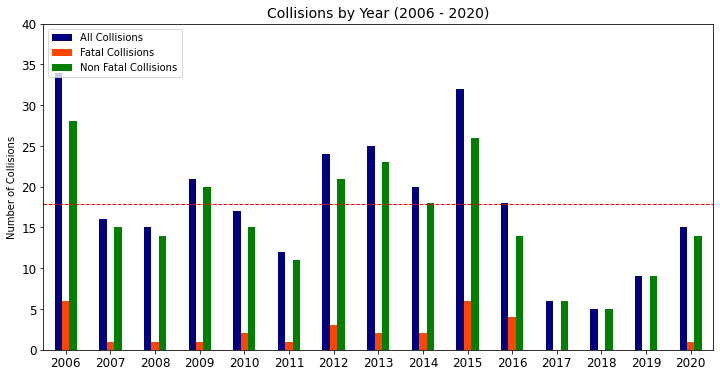

In [134]:
ax = fatal_year[['All Collisions', 'Fatal Collisions',"Non Fatal Collisions"]].plot(
    kind='bar', 
    rot=0, 
    figsize=(12, 6), 
    color=['navy', 'orangered',"green"]
)

ax.set_title('Collisions by Year (2006 - 2020)', fontsize=14)
ax.set_ylabel('Number of Collisions')
ax.set_xlabel(' ')
ax.set_ylim([0, 40])
ax.legend(loc='upper left')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

ax.axhline(fatal_year['All Collisions'].mean(), color='red', linestyle='dashed', linewidth=1)

pass

In [135]:
#Overall collision trend by year - plotly (figures as dictionaries)

In [136]:
fig = {
    "data": [{"type": "bar",
              "x": fatal_year.index,
              "y": fatal_year['All Collisions'],
              "name": "All",
              "marker_color": "rgb(0, 0, 128)",
              "hoverinfo": "y"
             },
             {"type": "bar",
              "x": fatal_year.index,
              "y": fatal_year['Fatal Collisions'],
              "name": "Fatal",
              "marker_color": "rgb(255, 69, 0)",
              "hoverinfo": "y"
             }],
    "layout": {"title": {"text": "Collisions by Year (2006 - 2020)", "font_size": 20},
               "xaxis": {"tickfont_size": 12, 
                         "type": "category"},
               "yaxis": {"title": "Number of Collisions",  
                         "tickfont_size": 12},
               "barmode": "group",
               "bargap": 0.25,
               "bargroupgap": 0.1,
               "plot_bgcolor": "#F5F5F5"
              }
}

pio.show(fig)

In [137]:
#Bike & ped collisions by year

In [138]:
bp_collision = merge_redlight_seriouslyinjured[merge_redlight_seriouslyinjured.BIKE_PED_COLLISION=='YES'][['YEAR', 'BIKE_PED_COLLISION', 'ACCLASS']]
bp_collision = bp_collision.groupby('YEAR').agg({
    'BIKE_PED_COLLISION': 'count',
    'ACCLASS': lambda x: (x=='Fatal').sum()
    }
)

bp_collision['Percent BP Fatal Collisions'] = bp_collision.ACCLASS / bp_collision.BIKE_PED_COLLISION
bp_collision.rename(columns={
    'BIKE_PED_COLLISION': 'Bike & Ped Collision',
    'ACCLASS': 'Fatal Collisions'
    }, inplace=True
)

bp_collision

,Bike & Ped Collision,Fatal Collisions,Percent BP Fatal Collisions
YEAR,,,
2006,15,2,0.133333
2007,8,1,0.125000
2008,6,1,0.166667
2009,9,1,0.111111
2010,11,1,0.090909
2011,5,0,0.000000
2012,11,2,0.181818
2013,12,2,0.166667
2014,10,1,0.100000


In [139]:
# Concatenate with all collisions
collision_compare = pd.concat([bp_collision, fatal_year], axis=1)
collision_compare

,Bike & Ped Collision,Fatal Collisions,Percent BP Fatal Collisions,All Collisions,Fatal Collisions,Non Fatal Collisions,Percent of Fatal Collisions
YEAR,,,,,,,
2006,15,2,0.133333,34,6,28,0.176471
2007,8,1,0.125000,16,1,15,0.062500
2008,6,1,0.166667,15,1,14,0.066667
2009,9,1,0.111111,21,1,20,0.047619
2010,11,1,0.090909,17,2,15,0.117647
2011,5,0,0.000000,12,1,11,0.083333
2012,11,2,0.181818,24,3,21,0.125000
2013,12,2,0.166667,25,2,23,0.080000
2014,10,1,0.100000,20,2,18,0.100000


In [140]:
fig = {
    "data": [{"type": "scatter",
              "x": collision_compare.index,
              "y": collision_compare['Percent BP Fatal Collisions'],
              "name": "% Fatal bike & ped collisions",
              "marker_color": "rgb(250, 128, 114)",
              "hoverinfo": "y"
             },
             {"type": "scatter",
              "x": collision_compare.index,
              "y": collision_compare['Percent of Fatal Collisions'],
              "name": "% Fatal collisions",
              "marker_color": "rgb(255, 165, 0)",
              "hoverinfo": "y"
             }],
    "layout": {"title": {"text": "Percent of Fatal Collisions by Year (2006 - 2020)", "font_size": 20},
               "xaxis": {"tickfont_size": 12, 
                         "type": "category"},
               "yaxis": {"title": "Ratio",  
                         "tickfont_size": 12,
                         "tickformat": ",.0%"},
               "barmode": "group",
               "bargap": 0.25,
               "bargroupgap": 0.1,
               "legend_orientation": "h"
              }
}

pio.show(fig)

In [141]:
#Collision by Day of Week

In [142]:
#Extracting Week from Date
merge_redlight_seriouslyinjured["Day_of_Week"]=merge_redlight_seriouslyinjured["DATE"].dt.day_name()

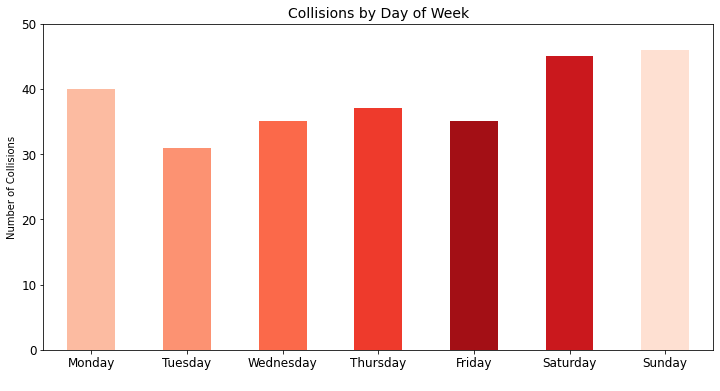

In [143]:
collision_dow = pd.Series(merge_redlight_seriouslyinjured.groupby('Day_of_Week').count()['ACCNUM'])
collision_dow = collision_dow.reindex([
    'Monday', 
    'Tuesday', 
    'Wednesday', 
    'Thursday', 
    'Friday', 
    'Saturday', 
    'Sunday'
])

pal = sns.color_palette('Reds', 7) 
colordict = {
    'Friday': pal[6],
    'Saturday': pal[5],
    'Thursday': pal[4],
    'Wednesday': pal[3],
    'Tuesday': pal[2],
    'Sunday': pal[0],
    'Monday': pal[1]
}

ax = collision_dow.plot(figsize=(12, 6), kind='bar', color=[colordict[i] for i in collision_dow.index], width=0.5, rot=0)

ax.set_title('Collisions by Day of Week', fontsize=14)
ax.set_ylim((0, 50))
ax.set_ylabel('Number of Collisions')
ax.set_xlabel(' ')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
    
pass

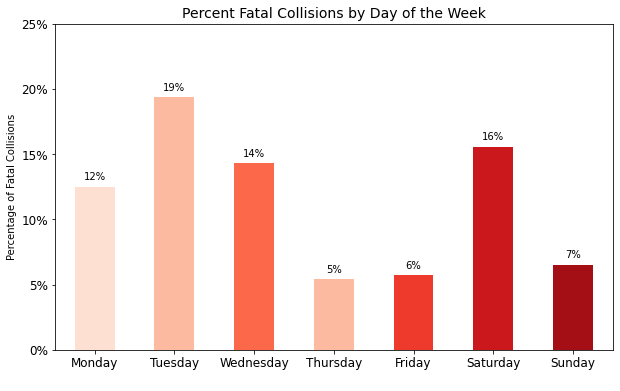

In [144]:
severe_collision_dow = pd.Series(merge_redlight_seriouslyinjured.groupby('Day_of_Week')['ACCLASS'].agg(lambda x: (x == 'Fatal').mean()))
severe_collision_dow = severe_collision_dow.reindex([
    'Monday', 
    'Tuesday', 
    'Wednesday', 
    'Thursday', 
    'Friday', 
    'Saturday', 
    'Sunday'
])

pal = sns.color_palette("Reds", 7) 
colordict = {'Friday': pal[4],
             'Saturday': pal[5],
             'Thursday': pal[1],
             'Wednesday': pal[3],
             'Tuesday': pal[1],
             'Sunday': pal[6],
             'Monday': pal[0]}

ax = severe_collision_dow.plot(figsize=(10, 6), kind='bar', color=[colordict[i] for i in severe_collision_dow.index], width=0.5, rot=0)

ax.set_title('Percent Fatal Collisions by Day of the Week', fontsize=14)
ax.set_ylabel('Percentage of Fatal Collisions')
plt.ylim([0, 0.25])
ax.set_xlabel(' ')

fmt = '{x:,.0%}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
    
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    va = 'bottom'
    label = '{:.0%}'.format(y_value)
    ax.annotate(label,
                 (x_value, y_value),
                 xytext=(0, space),
                 textcoords='offset points',
                 ha='center',
                 va=va)

pass

In [145]:
merge_redlight_seriouslyinjured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 268
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ACTIVATION_DATE     269 non-null    object        
 1   NAME                269 non-null    object        
 2   DISTRICT            269 non-null    object        
 3   RLC                 269 non-null    int64         
 4   Longitude           269 non-null    float64       
 5   Latitude            269 non-null    float64       
 6   Month_RLC           269 non-null    object        
 7   Year_RLC            269 non-null    int64         
 8   ACCNUM              269 non-null    int64         
 9   INVTYPE             269 non-null    object        
 10  INVAGE              269 non-null    object        
 11  INJURY_ID           241 non-null    float64       
 12  VEHTYPE             257 non-null    object        
 13  YEAR                269 non-null    int64         

In [146]:
merge_redlight_seriouslyinjured

,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month_RLC,Year_RLC,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,BIKE_PED_COLLISION,Day_of_Week,Month
0,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007,1339123,Driver,35 to 39,1.0,"Automobile, Station Wagon",2012,2012-12-11,535,5,LAKE SHORE BLVD W,YORK ST,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Tuesday,December
1,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007,4001700272,Driver,20 to 24,1.0,"Automobile, Station Wagon",2014,2014-03-14,1545,15,YORK ST,YORK ST GARDINER W RAMP,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Friday,March
2,2007-11-09,Steeles Ave W And Carpenter Rd / Private Acces...,North York,6003,-79.4475,43.7920,November,2007,1196444,Vehicle Owner,unknown,NaN,Other,2010,2010-10-21,1315,13,STEELES AVE W,CARPENTER RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Thursday,October
3,2007-11-09,Steeles Ave W And Hilda Ave,North York,6004,-79.4292,43.7960,November,2007,2260605,Driver,30 to 34,1.0,"Automobile, Station Wagon",2020,2020-11-29,2200,22,STEELES AVE W,HILDA AVE,1.0,Intersection,Traffic Signal,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Sunday,November
4,2007-11-09,Albion Rd And Silverstone Dr,Etobicoke York,6005,-79.6000,43.7429,November,2007,910951,Driver,30 to 34,1.0,"Automobile, Station Wagon",2006,2006-06-13,2124,21,SILVERSTONE DR,ALBION RD,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Tuesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2021-09-30,Evans Ave And Horner Ave,Etobicoke York,6246,-79.5188,43.6169,September,2021,9001113942,Cyclist,50 to 54,4.0,Bicycle,2019,2019-06-16,1710,17,EVANS AVE,HORNER AVE,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Cyclist Collisions,YES,Sunday,June
265,2022-03-17,O Connor Dr And Pape Ave,Toronto and East York,6255,-79.3502,43.6932,March,2022,957966,Vehicle Owner,unknown,NaN,"Automobile, Station Wagon",2007,2007-03-09,1724,17,O CONNOR DR,PAPE AVE,1.0,Intersection,Traffic Signal,Clear,Dusk,Dry,Fatal,Pedestrian Collisions,YES,Friday,March
266,2022-03-17,O Connor Dr And Pape Ave,Toronto and East York,6255,-79.3502,43.6932,March,2022,1276036,Driver,25 to 29,1.0,"Automobile, Station Wagon",2011,2011-12-10,1533,15,O CONNOR DR,PAPE AVE,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Saturday,December
267,2022-03-30,Meadowvale Rd And Dean Park Rd / Generation Blvd,Scarborough,6256,-79.1687,43.8042,March,2022,3000989119,Driver,60 to 64,4.0,"Automobile, Station Wagon",2013,2013-11-17,1506,15,MEADOWVALE RD,DEAN PARK RD,3.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,NaN,Sunday,November


In [147]:
#Let's bring in time of day

In [148]:
collision_dow_hod = merge_redlight_seriouslyinjured.groupby(['HOUR', 'Day_of_Week'])['ACCNUM'].count().unstack()
collision_dow_hod = collision_dow_hod[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
collision_dow_hod=collision_dow_hod.fillna(0)

temp = merge_redlight_seriouslyinjured[(merge_redlight_seriouslyinjured.ACCLASS=='Fatal')]
collision_dow_hod_severe = temp.groupby(['HOUR', 'Day_of_Week'])['ACCNUM'].count().unstack()
collision_dow_hod_severe = collision_dow_hod_severe[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
collision_dow_hod_severe=collision_dow_hod_severe.fillna(0)
data = [collision_dow_hod, collision_dow_hod_severe]
title = [
    'Collision by Day of Week and Time of Day', 
    'Fatal Collisions by Day of Week and Time of Day' #is fatal
]
chart_data = zip(data, title)

for item in chart_data:
    
    fig = {
        "data": [{"type": "heatmap",
                  "x": item[0].columns,
                  "y": item[0].index,
                  "z": item[0].values.tolist(),
                 }],
        "layout": {"title": {"text": item[1], "font_size": 20},
                   "xaxis": {"title": "Day of Week",
                             "tickfont_size": 12, 
                             "type": "category"},
                   "yaxis": {"title": "Hour of Day",  
                             "tickfont_size": 12,
                             "type": "category"},
                   "height": 650
                  }
    }

    pio.show(fig)

In [149]:
#Collisions by IMPACT Type

In [150]:
# by year
t1 = merge_redlight_seriouslyinjured.groupby(['YEAR', 'IMPACTYPE'])['ACCNUM'].count().unstack()
t1

IMPACTYPE,Angle,Approaching,Cyclist Collisions,Other,Pedestrian Collisions,Rear End,SMV Other,Sideswipe,Turning Movement
YEAR,,,,,,,,,
2006,8.0,NaN,1.0,NaN,14.0,1.0,3.0,1.0,6.0
2007,2.0,NaN,2.0,NaN,6.0,4.0,NaN,NaN,2.0
2008,4.0,NaN,NaN,NaN,6.0,2.0,1.0,NaN,2.0
2009,4.0,NaN,NaN,NaN,8.0,1.0,NaN,NaN,8.0
2010,2.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,4.0
2011,3.0,NaN,NaN,NaN,5.0,1.0,1.0,NaN,2.0
2012,6.0,NaN,1.0,NaN,10.0,NaN,NaN,NaN,7.0
2013,3.0,NaN,2.0,NaN,10.0,2.0,1.0,1.0,6.0
2014,1.0,NaN,4.0,2.0,6.0,NaN,1.0,NaN,6.0


In [151]:
# by visibility type
t2 = merge_redlight_seriouslyinjured.groupby(['IMPACTYPE', 'VISIBILITY'])['ACCNUM'].count().unstack()
t2.drop(['Clear'], axis=1, inplace=True)
t2

VISIBILITY,Freezing Rain,Other,Rain,Snow
IMPACTYPE,,,,
Angle,1.0,NaN,5.0,1.0
Approaching,NaN,NaN,NaN,NaN
Cyclist Collisions,NaN,NaN,1.0,NaN
Other,NaN,NaN,NaN,NaN
Pedestrian Collisions,NaN,1.0,27.0,2.0
Rear End,NaN,NaN,3.0,NaN
SMV Other,NaN,NaN,NaN,NaN
Sideswipe,NaN,NaN,NaN,NaN
Turning Movement,NaN,NaN,1.0,NaN


In [152]:
# by visibiloty type in terms of percentages
t2.div(t2.sum(axis=1)/100, axis=0).round()

VISIBILITY,Freezing Rain,Other,Rain,Snow
IMPACTYPE,,,,
Angle,14.0,NaN,71.0,14.0
Approaching,NaN,NaN,NaN,NaN
Cyclist Collisions,NaN,NaN,100.0,NaN
Other,NaN,NaN,NaN,NaN
Pedestrian Collisions,NaN,3.0,90.0,7.0
Rear End,NaN,NaN,100.0,NaN
SMV Other,NaN,NaN,NaN,NaN
Sideswipe,NaN,NaN,NaN,NaN
Turning Movement,NaN,NaN,100.0,NaN


In [153]:
# by severity
t3 = merge_redlight_seriouslyinjured.groupby(['IMPACTYPE', 'ACCLASS'])['ACCNUM'].count().unstack()
#t3.drop(['Property Damage Only'], axis=1, inplace=True)
#t3.drop(['Vehicle/Pedestrian'], axis=0, inplace=True)
t3

ACCLASS,Fatal,Non-Fatal Injury
IMPACTYPE,,
Angle,8.0,40.0
Approaching,NaN,2.0
Cyclist Collisions,3.0,15.0
Other,NaN,2.0
Pedestrian Collisions,14.0,95.0
Rear End,2.0,16.0
SMV Other,1.0,6.0
Sideswipe,NaN,3.0
Turning Movement,2.0,60.0


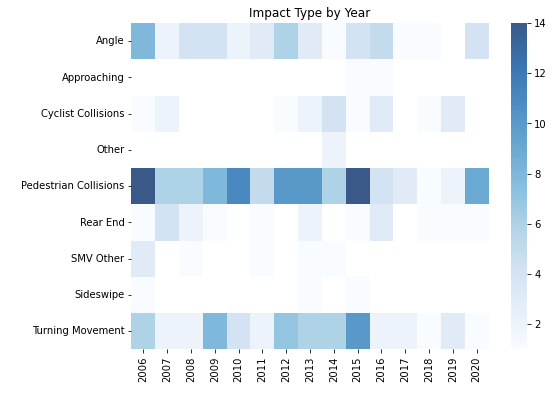

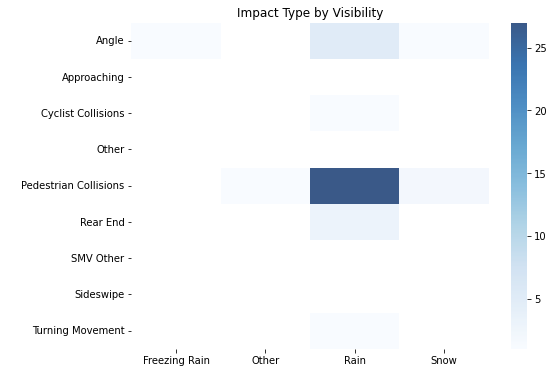

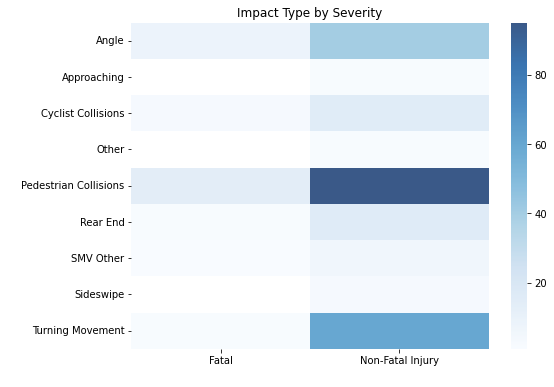

In [176]:
title = ['Impact Type by Year', 'Impact Type by Visibility', 'Impact Type by Severity']
ylabel = ['Year', 'Visibility', 'Severity']
t_data = [t1.T, t2, t3]

for t in zip(title, ylabel, t_data):
    plt.figure(figsize = (8,6))
    sns.heatmap(t[2], cmap='Blues', alpha=0.8)
    plt.title(t[0])
    plt.xlabel(' ')
    plt.ylabel(' ')

In [155]:
#Year by total number of accidents WITH Red Light Camera
df_redlightaccident_by_year=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["YEAR"],as_index=False)["ACCNUM"].count())
df_redlightaccident_by_year

,YEAR,ACCNUM
0,2006,34
1,2007,16
2,2008,15
3,2009,21
4,2010,17
5,2011,12
6,2012,24
7,2013,25
8,2014,20
9,2015,32


<AxesSubplot:xlabel='YEAR'>

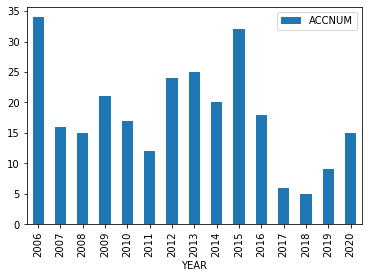

In [156]:
#Creating bar chart to for year to total accidents
df_redlightaccident_by_year.plot(x="YEAR", y="ACCNUM",kind="bar")

In [157]:
#Month by total number of accidents WITH Red Light Camera
df_redlightaccident_by_month=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["Month"],as_index=False)["ACCNUM"].count())
df_redlightaccident_by_month

,Month,ACCNUM
0,April,30
1,August,30
2,December,19
3,February,13
4,January,17
5,July,19
6,June,30
7,March,17
8,May,17
9,November,23


<AxesSubplot:xlabel='Month'>

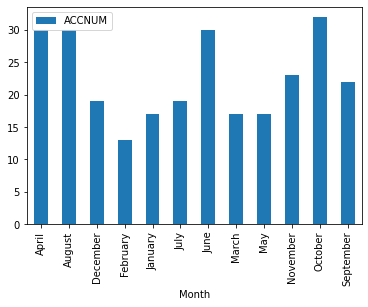

In [158]:
#Creating bar chart to for month to total accidents
df_redlightaccident_by_month.plot(x="Month", y="ACCNUM",kind="bar")

In [159]:
#Total number of accidents by Days of Week WITH Red Light Camera
df_hourofthedayaccident=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["HOUR"])["ACCNUM"].count())
df_hourofthedayaccident

,ACCNUM
HOUR,
0,12
1,3
2,4
3,10
4,1
5,4
6,12
7,9
8,4


<AxesSubplot:xlabel='HOUR'>

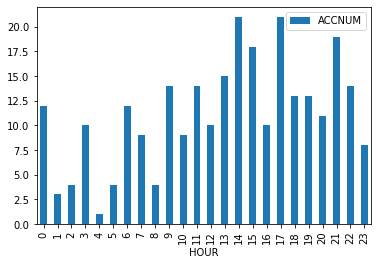

In [160]:
#Creating bar chart to for Hours of day to total accidents
df_hourofthedayaccident.plot(kind="bar")

In [161]:
#Total number of accidents by Involvement Type WITH Red Light Camera
df_involvement_type=pd.DataFrame(merge_redlight_seriouslyinjured.groupby("INVTYPE",as_index=False)["ACCNUM"].count())
df_involvement_type

,INVTYPE,ACCNUM
0,Cyclist,5
1,Driver,175
2,Moped Driver,1
3,Motorcycle Driver,11
4,Other,3
5,Passenger,27
6,Pedestrian,9
7,Truck Driver,5
8,Vehicle Owner,33


In [162]:
#Total number of accidents by Visibility and Accident Classification WITH Red Light Camera
df_visibility=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["VISIBILITY","ACCLASS"],as_index=False)["ACCNUM"].count())
df_visibility

,VISIBILITY,ACCLASS,ACCNUM
0,Clear,Fatal,27
1,Clear,Non-Fatal Injury,200
2,Freezing Rain,Non-Fatal Injury,1
3,Other,Non-Fatal Injury,1
4,Rain,Fatal,3
5,Rain,Non-Fatal Injury,34
6,Snow,Non-Fatal Injury,3


<AxesSubplot:xlabel='ACCLASS'>

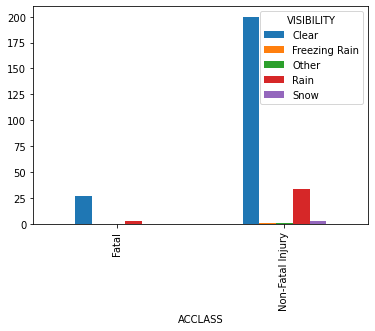

In [163]:
#Creating bar chart for Visibility
df_visibility.pivot_table(index="ACCLASS",columns="VISIBILITY").plot(kind="bar",y="ACCNUM")

In [164]:
#Total number of accidents by Road Condition and Accident Classification WITH Red Light Camera
df_roadcondition=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["RDSFCOND","ACCLASS"],as_index=False)["ACCNUM"].count())
df_roadcondition

,RDSFCOND,ACCLASS,ACCNUM
0,Dry,Fatal,25
1,Dry,Non-Fatal Injury,188
2,Loose Snow,Non-Fatal Injury,2
3,Slush,Non-Fatal Injury,1
4,Wet,Fatal,5
5,Wet,Non-Fatal Injury,48


<AxesSubplot:xlabel='ACCLASS'>

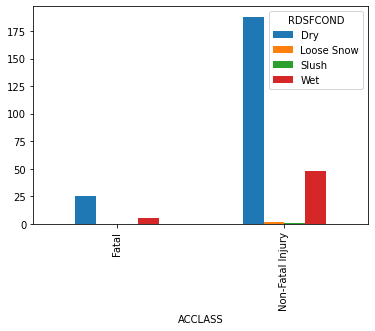

In [165]:
#Creating Bar chart for road condition
df_roadcondition.pivot_table(index="ACCLASS",columns="RDSFCOND").plot(kind="bar",y="ACCNUM")

In [166]:
#Total number of accidents by Light and Accident Classification WITH Red Light Camera
df_light=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["LIGHT","ACCLASS"],as_index=False)["ACCNUM"].count())
df_light

,LIGHT,ACCLASS,ACCNUM
0,Dark,Fatal,6
1,Dark,Non-Fatal Injury,46
2,"Dark, artificial",Fatal,5
3,"Dark, artificial",Non-Fatal Injury,49
4,Dawn,Fatal,1
5,Dawn,Non-Fatal Injury,3
6,Daylight,Fatal,16
7,Daylight,Non-Fatal Injury,133
8,"Daylight, artificial",Non-Fatal Injury,1
9,Dusk,Fatal,2


<AxesSubplot:xlabel='ACCLASS'>

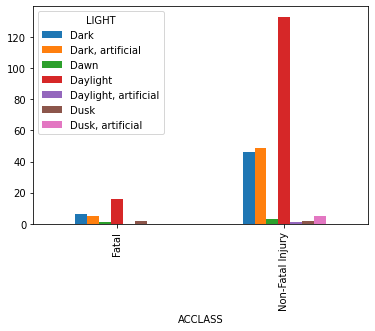

In [167]:
#Creating Bar chart for Light
df_light.pivot_table(index="ACCLASS",columns="LIGHT").plot(kind="bar",y="ACCNUM")

In [168]:
#Total number of accidents by Impact Type WITH Red Light Camera
df_impact_type=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["IMPACTYPE"],as_index=False)["ACCNUM"].count())
df_impact_type

,IMPACTYPE,ACCNUM
0,Angle,48
1,Approaching,2
2,Cyclist Collisions,18
3,Other,2
4,Pedestrian Collisions,109
5,Rear End,18
6,SMV Other,7
7,Sideswipe,3
8,Turning Movement,62


<AxesSubplot:xlabel='IMPACTYPE'>

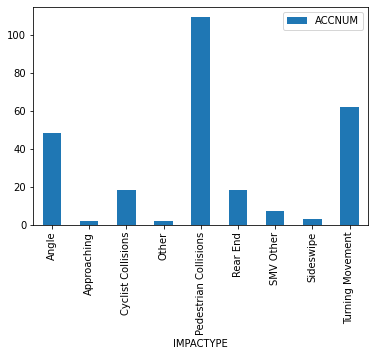

In [169]:
#Creating bar chart for IMPACT Type
df_impact_type.plot("IMPACTYPE","ACCNUM",kind="bar")

# CREATING HEADMAP OF ACCIDENT DATA BY YEAR AND MONTH

In [170]:
def RTAs_by_month(df, month):
    month_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["Month"] == month and row["Day_of_Week"] == "Monday": mon +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Tuesday": tues +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Wednesday": wed +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Thursday": thurs +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Friday": fri +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Saturday": sat +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Sunday": sun +=1
        else: a=0 

    month_list.append(mon)
    month_list.append(tues)
    month_list.append(wed)
    month_list.append(thurs)
    month_list.append(fri)
    month_list.append(sat)
    month_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(month_list)

In [171]:
#Extract RTA data for each day by month
january = RTAs_by_month(merge_redlight_seriouslyinjured, "January")
february = RTAs_by_month(merge_redlight_seriouslyinjured, "February")
march = RTAs_by_month(merge_redlight_seriouslyinjured, "March")
april = RTAs_by_month(merge_redlight_seriouslyinjured, "April")
may = RTAs_by_month(merge_redlight_seriouslyinjured, "May")
june = RTAs_by_month(merge_redlight_seriouslyinjured, "June")
july = RTAs_by_month(merge_redlight_seriouslyinjured, "July")
august = RTAs_by_month(merge_redlight_seriouslyinjured, "August")
september = RTAs_by_month(merge_redlight_seriouslyinjured, "September")
october = RTAs_by_month(merge_redlight_seriouslyinjured, "October")
november = RTAs_by_month(merge_redlight_seriouslyinjured, "November")
december = RTAs_by_month(merge_redlight_seriouslyinjured, "December")

In [172]:
#Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data = np.array([january, february, march, april, may, june, july, august, september, october, november, december])
heatmap_df = pd.DataFrame(data=data, index=rows, columns=columns)

In [173]:
heatmap_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
January,3,3,1,1,3,1,5
February,2,1,3,2,0,2,3
March,3,1,2,2,3,5,1
April,3,4,4,5,2,6,6
May,2,1,5,1,4,4,0
June,2,5,2,5,1,7,8
July,2,4,1,3,3,4,2
August,6,5,3,5,4,4,3
September,4,1,2,5,3,4,3
October,8,2,5,4,5,3,5


Text(0.5, 1.0, 'Total Accidents WITH RED LIGHT CAMERA by week for each month from 2006-2020')

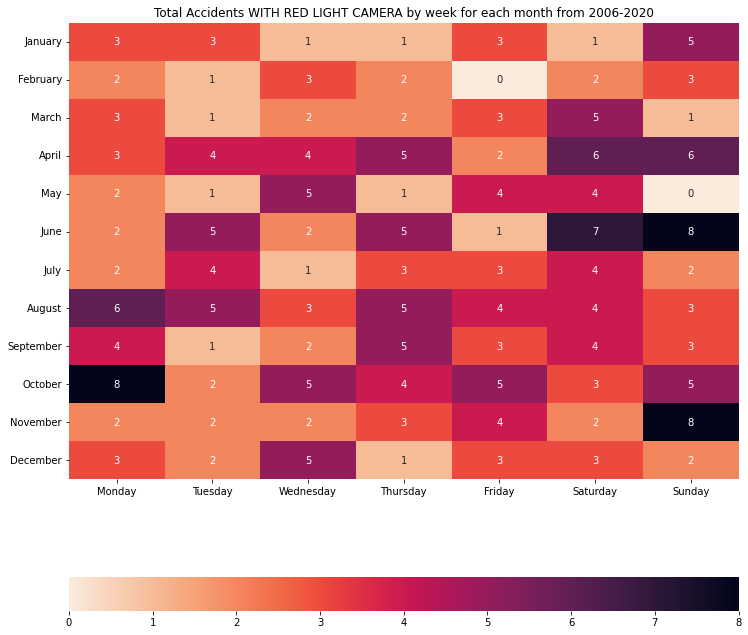

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
map1 = sns.heatmap(heatmap_df, annot=True, fmt="d", cmap='rocket_r', cbar_kws={"orientation": "horizontal"} )
map1.set_title("Total Accidents WITH RED LIGHT CAMERA by week for each month from 2006-2020")

# MERGE2 - Get data Without Red Light Camera

In [62]:
#Merged table using RIGHT JOIN to get the data without red light camera
no_red_light_camera=pd.merge(red_light_camera_df, seriously_injured_df,how='right',on=['Longitude','Latitude'])
no_red_light_camera

,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month_RLC,Year_RLC,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,BIKE_PED_COLLISION,Day_of_Week,Month
0,NaN,NaN,NaN,NaN,-79.3771,43.7109,NaN,NaN,25301,Driver,75 to 79,1.0,"Automobile, Station Wagon",2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,1.0,Intersection,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,YES,Saturday,January
1,NaN,NaN,NaN,NaN,-79.3755,43.6595,NaN,NaN,26294,Pedestrian,65 to 69,2.0,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,YES,Saturday,January
2,NaN,NaN,NaN,NaN,-79.4336,43.6496,NaN,NaN,37330,Driver,50 to 54,1.0,"Automobile, Station Wagon",2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,3.0,Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Monday,January
3,NaN,NaN,NaN,NaN,-79.2974,43.7255,NaN,NaN,45664,Driver,50 to 54,5.0,"Automobile, Station Wagon",2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,NaN,Tuesday,January
4,NaN,NaN,NaN,NaN,-79.5755,43.7018,NaN,NaN,56815,Driver,45 to 49,1.0,Delivery Van,2020,2020-01-09,1100,11,MARTIN GROVE RD,BELFIELD RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,NaN,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,NaN,NaN,NaN,NaN,-79.5166,43.7532,NaN,NaN,9002496688,Pedestrian,10 to 14,4.0,NaN,2019,2019-12-27,2324,23,2901 JANE ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Friday,December
6005,NaN,NaN,NaN,NaN,-79.4489,43.6765,NaN,NaN,9002500056,Driver,40 to 44,1.0,"Automobile, Station Wagon",2019,2019-12-28,1439,14,1325 ST CLAIR AVE W,NaN,1.0,Mid-Block,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Saturday,December
6006,NaN,NaN,NaN,NaN,-79.3848,43.6584,NaN,NaN,9002500260,Driver,50 to 54,1.0,"Automobile, Station Wagon",2019,2019-12-28,1514,15,GERRARD ST W,BAY ST,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Saturday,December
6007,NaN,NaN,NaN,NaN,-79.5707,43.6915,NaN,NaN,9002501134,Driver,20 to 24,1.0,"Automobile, Station Wagon",2019,2019-12-28,1740,17,MARTIN GROVE RD,DIXON RD,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Saturday,December


In [63]:
no_red_light_camera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6009 entries, 0 to 6008
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ACTIVATION_DATE     269 non-null    object 
 1   NAME                269 non-null    object 
 2   DISTRICT            269 non-null    object 
 3   RLC                 269 non-null    float64
 4   Longitude           6009 non-null   float64
 5   Latitude            6009 non-null   float64
 6   Month_RLC           269 non-null    object 
 7   Year_RLC            269 non-null    float64
 8   ACCNUM              6009 non-null   int64  
 9   INVTYPE             6001 non-null   object 
 10  INVAGE              6009 non-null   object 
 11  INJURY_ID           5316 non-null   float64
 12  VEHTYPE             5591 non-null   object 
 13  YEAR                6009 non-null   int64  
 14  DATE                6009 non-null   object 
 15  TIME                6009 non-null   int64  
 16  HOUR  

In [64]:
#Changing data type of DATE column to datetime
no_red_light_camera['DATE'] = pd.to_datetime(no_red_light_camera['DATE'])

In [65]:
#Extracting Week from Date
no_red_light_camera["Day_of_Week"]=no_red_light_camera["DATE"].dt.day_name()

In [66]:
#GET THE DATA WITHOUT RED LIGHT CAMERAS where the RLC (Red Light Camera) column is null: filtering on null RLC
area_without_redlightcameras=no_red_light_camera[no_red_light_camera["RLC"].isna()]

In [67]:
#Checkimg the data
area_without_redlightcameras

,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month_RLC,Year_RLC,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,BIKE_PED_COLLISION,Day_of_Week,Month
0,NaN,NaN,NaN,NaN,-79.3771,43.7109,NaN,NaN,25301,Driver,75 to 79,1.0,"Automobile, Station Wagon",2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,1.0,Intersection,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,YES,Saturday,January
1,NaN,NaN,NaN,NaN,-79.3755,43.6595,NaN,NaN,26294,Pedestrian,65 to 69,2.0,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,YES,Saturday,January
2,NaN,NaN,NaN,NaN,-79.4336,43.6496,NaN,NaN,37330,Driver,50 to 54,1.0,"Automobile, Station Wagon",2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,3.0,Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Monday,January
3,NaN,NaN,NaN,NaN,-79.2974,43.7255,NaN,NaN,45664,Driver,50 to 54,5.0,"Automobile, Station Wagon",2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,NaN,Tuesday,January
4,NaN,NaN,NaN,NaN,-79.5755,43.7018,NaN,NaN,56815,Driver,45 to 49,1.0,Delivery Van,2020,2020-01-09,1100,11,MARTIN GROVE RD,BELFIELD RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,NaN,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,NaN,NaN,NaN,NaN,-79.5166,43.7532,NaN,NaN,9002496688,Pedestrian,10 to 14,4.0,NaN,2019,2019-12-27,2324,23,2901 JANE ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Friday,December
6005,NaN,NaN,NaN,NaN,-79.4489,43.6765,NaN,NaN,9002500056,Driver,40 to 44,1.0,"Automobile, Station Wagon",2019,2019-12-28,1439,14,1325 ST CLAIR AVE W,NaN,1.0,Mid-Block,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Saturday,December
6006,NaN,NaN,NaN,NaN,-79.3848,43.6584,NaN,NaN,9002500260,Driver,50 to 54,1.0,"Automobile, Station Wagon",2019,2019-12-28,1514,15,GERRARD ST W,BAY ST,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Saturday,December
6007,NaN,NaN,NaN,NaN,-79.5707,43.6915,NaN,NaN,9002501134,Driver,20 to 24,1.0,"Automobile, Station Wagon",2019,2019-12-28,1740,17,MARTIN GROVE RD,DIXON RD,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Saturday,December


In [68]:
area_without_redlightcameras.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5740 entries, 0 to 6008
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ACTIVATION_DATE     0 non-null      object        
 1   NAME                0 non-null      object        
 2   DISTRICT            0 non-null      object        
 3   RLC                 0 non-null      float64       
 4   Longitude           5740 non-null   float64       
 5   Latitude            5740 non-null   float64       
 6   Month_RLC           0 non-null      object        
 7   Year_RLC            0 non-null      float64       
 8   ACCNUM              5740 non-null   int64         
 9   INVTYPE             5732 non-null   object        
 10  INVAGE              5740 non-null   object        
 11  INJURY_ID           5075 non-null   float64       
 12  VEHTYPE             5334 non-null   object        
 13  YEAR                5740 non-null   int64       

In [69]:
fatal_year = area_without_redlightcameras.groupby('YEAR').ACCLASS.agg([
    ('All Collisions', len),
    ('Fatal Collisions', lambda x: (x == 'Fatal').sum()),
    ('Non Fatal Collisions', lambda x: (x=="Non-Fatal Injury").sum()),
    ('Percent of Fatal Collisions', lambda x: (x == 'Fatal').mean())
    ]
)
fatal_year

,All Collisions,Fatal Collisions,Non Fatal Collisions,Percent of Fatal Collisions
YEAR,,,,
2006,449,52,397,0.115813
2007,439,46,393,0.104784
2008,403,50,353,0.124069
2009,417,44,373,0.105516
2010,383,40,343,0.104439
2011,387,33,354,0.085271
2012,430,41,389,0.095349
2013,407,61,346,0.149877
2014,330,49,281,0.148485


In [70]:
#collision by year

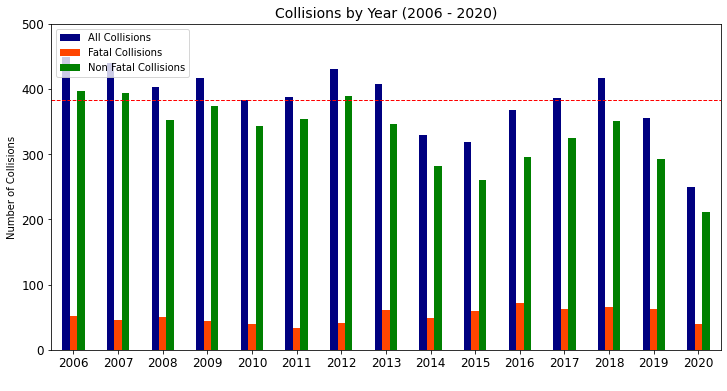

In [71]:
ax = fatal_year[['All Collisions', 'Fatal Collisions',"Non Fatal Collisions"]].plot(
    kind='bar', 
    rot=0, 
    figsize=(12, 6), 
    color=['navy', 'orangered',"green"]
)

ax.set_title('Collisions by Year (2006 - 2020)', fontsize=14)
ax.set_ylabel('Number of Collisions')
ax.set_xlabel(' ')
ax.set_ylim([0, 500])
ax.legend(loc='upper left')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

ax.axhline(fatal_year['All Collisions'].mean(), color='red', linestyle='dashed', linewidth=1)

pass

In [72]:
#Overall collision trend by year - plotly (figures as dictionaries)

In [73]:
fig = {
    "data": [{"type": "bar",
              "x": fatal_year.index,
              "y": fatal_year['All Collisions'],
              "name": "All",
              "marker_color": "rgb(0, 0, 128)",
              "hoverinfo": "y"
             },
             {"type": "bar",
              "x": fatal_year.index,
              "y": fatal_year['Fatal Collisions'],
              "name": "Fatal",
              "marker_color": "rgb(255, 69, 0)",
              "hoverinfo": "y"
             }],
    "layout": {"title": {"text": "Collisions by Year (2006 - 2020)", "font_size": 20},
               "xaxis": {"tickfont_size": 12, 
                         "type": "category"},
               "yaxis": {"title": "Number of Collisions",  
                         "tickfont_size": 12},
               "barmode": "group",
               "bargap": 0.25,
               "bargroupgap": 0.1,
               "plot_bgcolor": "#F5F5F5"
              }
}

pio.show(fig)

In [74]:
#Bike & ped collisions by year

In [75]:
bp_collision = area_without_redlightcameras[area_without_redlightcameras.BIKE_PED_COLLISION=='YES'][['YEAR', 'BIKE_PED_COLLISION', 'ACCLASS']]
bp_collision = bp_collision.groupby('YEAR').agg({
    'BIKE_PED_COLLISION': 'count',
    'ACCLASS': lambda x: (x=='Fatal').sum()
    }
)

bp_collision['Percent BP Fatal Collisions'] = bp_collision.ACCLASS / bp_collision.BIKE_PED_COLLISION
bp_collision.rename(columns={
    'BIKE_PED_COLLISION': 'Bike & Ped Collision',
    'ACCLASS': 'Fatal Collisions'
    }, inplace=True
)

bp_collision

,Bike & Ped Collision,Fatal Collisions,Percent BP Fatal Collisions
YEAR,,,
2006,252,31,0.123016
2007,219,24,0.109589
2008,217,27,0.124424
2009,236,31,0.131356
2010,216,21,0.097222
2011,235,20,0.085106
2012,263,25,0.095057
2013,261,44,0.168582
2014,181,33,0.182320


In [76]:
# Concatenate with all collisions
collision_compare = pd.concat([bp_collision, fatal_year], axis=1)
collision_compare

,Bike & Ped Collision,Fatal Collisions,Percent BP Fatal Collisions,All Collisions,Fatal Collisions,Non Fatal Collisions,Percent of Fatal Collisions
YEAR,,,,,,,
2006,252,31,0.123016,449,52,397,0.115813
2007,219,24,0.109589,439,46,393,0.104784
2008,217,27,0.124424,403,50,353,0.124069
2009,236,31,0.131356,417,44,373,0.105516
2010,216,21,0.097222,383,40,343,0.104439
2011,235,20,0.085106,387,33,354,0.085271
2012,263,25,0.095057,430,41,389,0.095349
2013,261,44,0.168582,407,61,346,0.149877
2014,181,33,0.182320,330,49,281,0.148485


In [77]:
fig = {
    "data": [{"type": "scatter",
              "x": collision_compare.index,
              "y": collision_compare['Percent BP Fatal Collisions'],
              "name": "% Fatal bike & ped collisions",
              "marker_color": "rgb(250, 128, 114)",
              "hoverinfo": "y"
             },
             {"type": "scatter",
              "x": collision_compare.index,
              "y": collision_compare['Percent of Fatal Collisions'],
              "name": "% Fatal collisions",
              "marker_color": "rgb(255, 165, 0)",
              "hoverinfo": "y"
             }],
    "layout": {"title": {"text": "Percent of Fatal Collisions by Year (2006 - 2020)", "font_size": 20},
               "xaxis": {"tickfont_size": 12, 
                         "type": "category"},
               "yaxis": {"title": "Ratio",  
                         "tickfont_size": 12,
                         "tickformat": ",.0%"},
               "barmode": "group",
               "bargap": 0.25,
               "bargroupgap": 0.1,
               "legend_orientation": "h"
              }
}

pio.show(fig)

In [78]:
#Collision by Day of Week

In [79]:
#Extracting Week from Date
area_without_redlightcameras["Day_of_Week"]=area_without_redlightcameras["DATE"].dt.day_name()

C:\Users\aditis\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



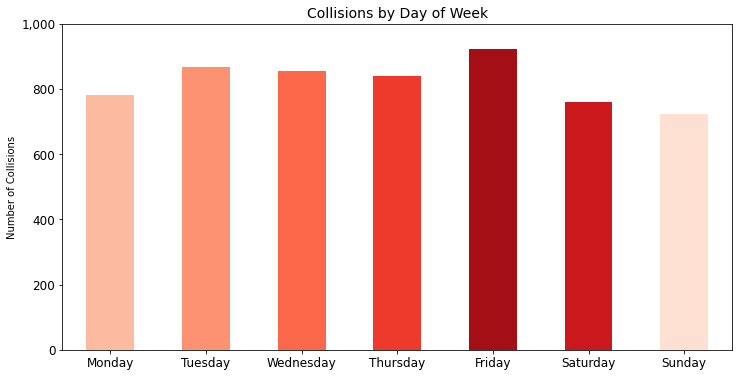

In [80]:
collision_dow = pd.Series(area_without_redlightcameras.groupby('Day_of_Week').count()['ACCNUM'])
collision_dow = collision_dow.reindex([
    'Monday', 
    'Tuesday', 
    'Wednesday', 
    'Thursday', 
    'Friday', 
    'Saturday', 
    'Sunday'
])

pal = sns.color_palette('Reds', 7) 
colordict = {
    'Friday': pal[6],
    'Saturday': pal[5],
    'Thursday': pal[4],
    'Wednesday': pal[3],
    'Tuesday': pal[2],
    'Sunday': pal[0],
    'Monday': pal[1]
}

ax = collision_dow.plot(figsize=(12, 6), kind='bar', color=[colordict[i] for i in collision_dow.index], width=0.5, rot=0)

ax.set_title('Collisions by Day of Week', fontsize=14)
ax.set_ylim((0, 1000))
ax.set_ylabel('Number of Collisions')
ax.set_xlabel(' ')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
    
pass

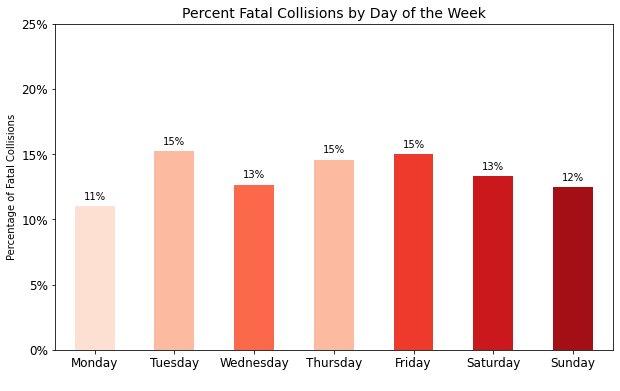

In [81]:
severe_collision_dow = pd.Series(area_without_redlightcameras.groupby('Day_of_Week')['ACCLASS'].agg(lambda x: (x == 'Fatal').mean()))
severe_collision_dow = severe_collision_dow.reindex([
    'Monday', 
    'Tuesday', 
    'Wednesday', 
    'Thursday', 
    'Friday', 
    'Saturday', 
    'Sunday'
])

pal = sns.color_palette("Reds", 7) 
colordict = {'Friday': pal[4],
             'Saturday': pal[5],
             'Thursday': pal[1],
             'Wednesday': pal[3],
             'Tuesday': pal[1],
             'Sunday': pal[6],
             'Monday': pal[0]}

ax = severe_collision_dow.plot(figsize=(10, 6), kind='bar', color=[colordict[i] for i in severe_collision_dow.index], width=0.5, rot=0)

ax.set_title('Percent Fatal Collisions by Day of the Week', fontsize=14)
ax.set_ylabel('Percentage of Fatal Collisions')
plt.ylim([0, 0.25])
ax.set_xlabel(' ')

fmt = '{x:,.0%}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
    
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    va = 'bottom'
    label = '{:.0%}'.format(y_value)
    ax.annotate(label,
                 (x_value, y_value),
                 xytext=(0, space),
                 textcoords='offset points',
                 ha='center',
                 va=va)

pass

In [82]:
#Let's bring in time of day

In [83]:
collision_dow_hod = area_without_redlightcameras.groupby(['HOUR', 'Day_of_Week'])['ACCNUM'].count().unstack()
collision_dow_hod = collision_dow_hod[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
collision_dow_hod=collision_dow_hod.fillna(0)

temp = area_without_redlightcameras[(area_without_redlightcameras.ACCLASS=='Fatal')]
collision_dow_hod_severe = temp.groupby(['HOUR', 'Day_of_Week'])['ACCNUM'].count().unstack()
collision_dow_hod_severe = collision_dow_hod_severe[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
collision_dow_hod_severe=collision_dow_hod_severe.fillna(0)

data = [collision_dow_hod, collision_dow_hod_severe]
title = [
    'Collision by Day of Week and Time of Day', 
    'Fatal Collisions by Day of Week and Time of Day'
]
chart_data = zip(data, title)

for item in chart_data:
    
    fig = {
        "data": [{"type": "heatmap",
                  "x": item[0].columns,
                  "y": item[0].index,
                  "z": item[0].values.tolist(),
                 }],
        "layout": {"title": {"text": item[1], "font_size": 20},
                   "xaxis": {"title": "Day of Week",
                             "tickfont_size": 12, 
                             "type": "category"},
                   "yaxis": {"title": "Hour of Day",  
                             "tickfont_size": 12,
                             "type": "category"},
                   "height": 650
                  }
    }

    pio.show(fig)

# Collisions by Impact Type

In [84]:
# by year
t1 = area_without_redlightcameras.groupby(['YEAR', 'IMPACTYPE'])['ACCNUM'].count().unstack()
t1

IMPACTYPE,Angle,Approaching,Cyclist Collisions,Other,Pedestrian Collisions,Rear End,SMV Other,SMV Unattended Vehicle,Sideswipe,Turning Movement
YEAR,,,,,,,,,,
2006,24.0,24.0,51.0,3.0,199.0,27.0,58.0,6.0,11.0,46.0
2007,33.0,23.0,35.0,1.0,181.0,34.0,52.0,6.0,11.0,63.0
2008,23.0,29.0,40.0,4.0,177.0,33.0,39.0,2.0,14.0,42.0
2009,19.0,16.0,39.0,3.0,193.0,39.0,44.0,6.0,9.0,49.0
2010,23.0,11.0,41.0,4.0,170.0,30.0,34.0,9.0,10.0,51.0
2011,10.0,10.0,52.0,2.0,181.0,42.0,41.0,2.0,10.0,37.0
2012,18.0,9.0,69.0,9.0,191.0,32.0,48.0,7.0,5.0,42.0
2013,11.0,14.0,62.0,6.0,195.0,19.0,35.0,4.0,10.0,51.0
2014,12.0,14.0,41.0,4.0,140.0,18.0,38.0,2.0,14.0,47.0


In [85]:
# by visibility type
t2 = area_without_redlightcameras.groupby(['IMPACTYPE', 'VISIBILITY'])['ACCNUM'].count().unstack()
t2.drop(['Clear'], axis=1, inplace=True)
t2

VISIBILITY,Drifting Snow,"Fog, Mist, Smoke, Dust",Freezing Rain,Other,Rain,Snow,Strong wind
IMPACTYPE,,,,,,,
Angle,NaN,NaN,NaN,3.0,22.0,5.0,NaN
Approaching,2.0,2.0,1.0,1.0,21.0,17.0,NaN
Cyclist Collisions,1.0,NaN,NaN,3.0,47.0,2.0,NaN
Other,NaN,NaN,NaN,7.0,5.0,1.0,NaN
Pedestrian Collisions,3.0,7.0,6.0,18.0,395.0,41.0,3.0
Rear End,NaN,1.0,2.0,NaN,23.0,9.0,NaN
SMV Other,NaN,4.0,3.0,3.0,68.0,28.0,NaN
SMV Unattended Vehicle,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Sideswipe,NaN,NaN,1.0,NaN,11.0,3.0,NaN


In [86]:
# by visibiloty type in terms of percentages
t2.div(t2.sum(axis=1)/100, axis=0).round()

VISIBILITY,Drifting Snow,"Fog, Mist, Smoke, Dust",Freezing Rain,Other,Rain,Snow,Strong wind
IMPACTYPE,,,,,,,
Angle,NaN,NaN,NaN,10.0,73.0,17.0,NaN
Approaching,5.0,5.0,2.0,2.0,48.0,39.0,NaN
Cyclist Collisions,2.0,NaN,NaN,6.0,89.0,4.0,NaN
Other,NaN,NaN,NaN,54.0,38.0,8.0,NaN
Pedestrian Collisions,1.0,1.0,1.0,4.0,84.0,9.0,1.0
Rear End,NaN,3.0,6.0,NaN,66.0,26.0,NaN
SMV Other,NaN,4.0,3.0,3.0,64.0,26.0,NaN
SMV Unattended Vehicle,NaN,NaN,NaN,NaN,100.0,NaN,NaN
Sideswipe,NaN,NaN,7.0,NaN,73.0,20.0,NaN


In [87]:
# by severity
t3 = area_without_redlightcameras.groupby(['IMPACTYPE', 'ACCLASS'])['ACCNUM'].count().unstack()
#t3.drop(['Property Damage Only'], axis=1, inplace=True)
#t3.drop(['Vehicle/Pedestrian'], axis=0, inplace=True)
t3

ACCLASS,Fatal,Non-Fatal Injury
IMPACTYPE,,
Angle,28,234
Approaching,37,189
Cyclist Collisions,38,650
Other,6,60
Pedestrian Collisions,450,2118
Rear End,17,379
SMV Other,107,505
SMV Unattended Vehicle,10,52
Sideswipe,9,124


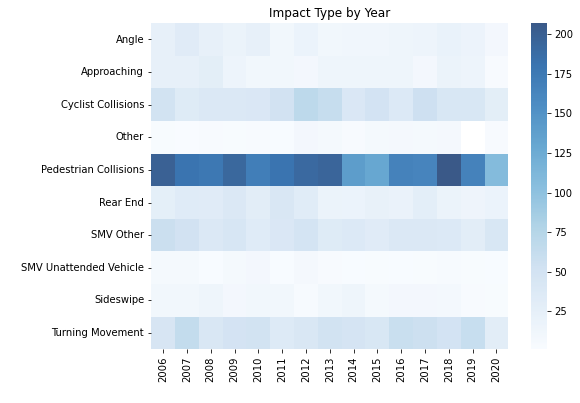

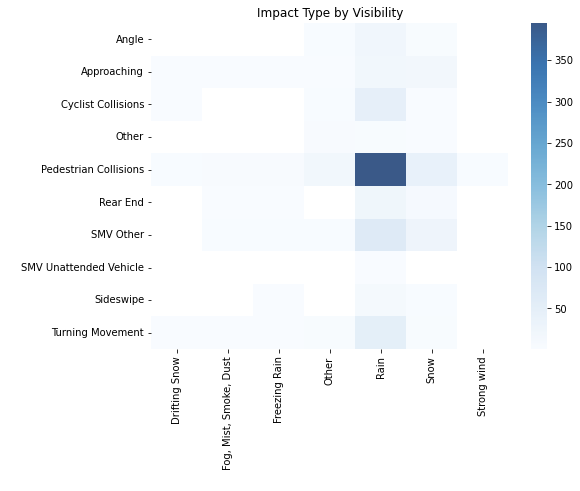

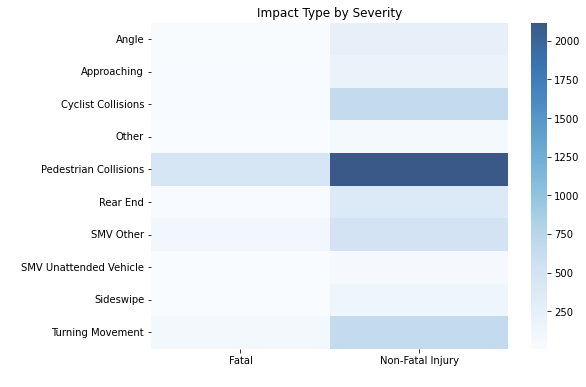

In [112]:
title = ['Impact Type by Year', 'Impact Type by Visibility', 'Impact Type by Severity']
ylabel = ['Year', 'Visibility', 'Severity']
t_data = [t1.T, t2, t3]

for t in zip(title, ylabel, t_data):
    plt.figure(figsize = (8,6))
    sns.heatmap(t[2], cmap='Blues', alpha=0.8)
    plt.title(t[0])
    plt.xlabel(' ')
    plt.ylabel(' ')

In [90]:
#setting size of all plots using rcParams
plt.rcParams["figure.figsize"]=(6,6)

<AxesSubplot:xlabel='YEAR'>

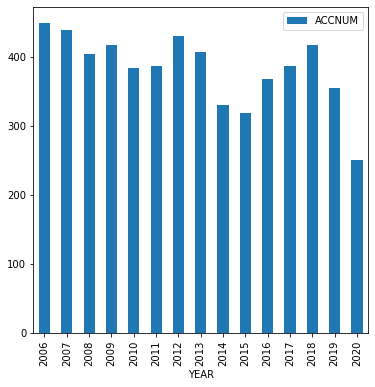

In [91]:
#Creating bar chart for total accidents by Year
df_noredlightaccident_by_year.plot(x ='YEAR', y='ACCNUM', kind = 'bar')

In [92]:
#Total number of accidents by Hour WITHOUT Red Light Camera
df_noredlightaccident_by_hour=pd.DataFrame(area_without_redlightcameras.groupby(["HOUR"])["ACCNUM"].count())
df_noredlightaccident_by_hour

,ACCNUM
HOUR,
0,161
1,141
2,157
3,125
4,60
5,100
6,192
7,201
8,238


<AxesSubplot:xlabel='HOUR'>

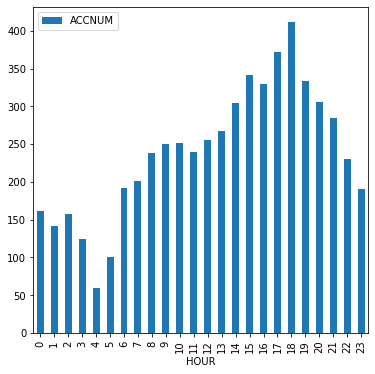

In [93]:
#Creating bar chart for total accidents by Hour of the day
df_noredlightaccident_by_hour.plot(kind = 'bar')

In [94]:
#Total number of accidents by VISIBILITY and Accident Classification WITHOUT Red Light Camera
df_visibility_noredlightcamera=pd.DataFrame(area_without_redlightcameras.groupby(["VISIBILITY","ACCLASS"],as_index=False)["ACCNUM"].count())
df_visibility_noredlightcamera

,VISIBILITY,ACCLASS,ACCNUM
0,Clear,Fatal,651
1,Clear,Non-Fatal Injury,4244
2,Drifting Snow,Non-Fatal Injury,7
3,"Fog, Mist, Smoke, Dust",Fatal,3
4,"Fog, Mist, Smoke, Dust",Non-Fatal Injury,13
5,Freezing Rain,Fatal,1
6,Freezing Rain,Non-Fatal Injury,13
7,Other,Fatal,19
8,Other,Non-Fatal Injury,21
9,Rain,Fatal,81


<AxesSubplot:xlabel='ACCLASS'>

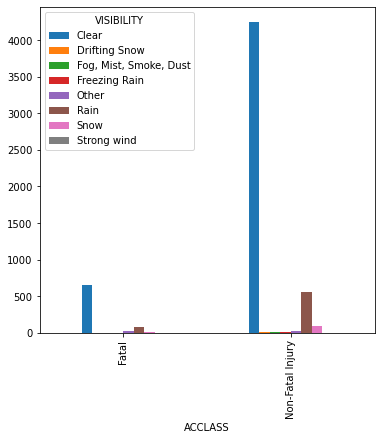

In [95]:
#Creating bar chart for Visibility
df_visibility_noredlightcamera.pivot_table(index="ACCLASS",columns="VISIBILITY").plot(kind="bar",y="ACCNUM")

In [96]:
#Total number of accidents by Road Condition and Accident Classification WITHOUT Red Light Camera
df_roadcondition_noredlightcamera=pd.DataFrame(area_without_redlightcameras.groupby(["RDSFCOND","ACCLASS"],as_index=False)["ACCNUM"].count())
df_roadcondition_noredlightcamera

,RDSFCOND,ACCLASS,ACCNUM
0,Dry,Fatal,597
1,Dry,Non-Fatal Injury,3942
2,Ice,Fatal,1
3,Ice,Non-Fatal Injury,21
4,Loose Sand or Gravel,Non-Fatal Injury,4
5,Loose Snow,Fatal,4
6,Loose Snow,Non-Fatal Injury,46
7,Other,Fatal,22
8,Other,Non-Fatal Injury,36
9,Packed Snow,Fatal,4


<AxesSubplot:xlabel='ACCLASS'>

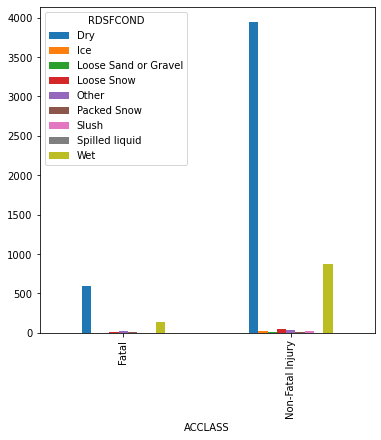

In [97]:
#Creating Bar chart for road condition
df_roadcondition_noredlightcamera.pivot_table(index="ACCLASS",columns="RDSFCOND").plot(kind="bar",y="ACCNUM")


In [98]:
#Total number of accidents by Light and Accident Classification WITHOUT Red Light Camera
df_light_noredlightcamera=pd.DataFrame(area_without_redlightcameras.groupby(["LIGHT","ACCLASS"],as_index=False)["ACCNUM"].count())
df_light_noredlightcamera

,LIGHT,ACCLASS,ACCNUM
0,Dark,Fatal,192
1,Dark,Non-Fatal Injury,961
2,"Dark, artificial",Fatal,151
3,"Dark, artificial",Non-Fatal Injury,865
4,Dawn,Fatal,4
5,Dawn,Non-Fatal Injury,29
6,"Dawn, artificial",Fatal,9
7,"Dawn, artificial",Non-Fatal Injury,29
8,Daylight,Fatal,393
9,Daylight,Non-Fatal Injury,2911


<AxesSubplot:xlabel='ACCLASS'>

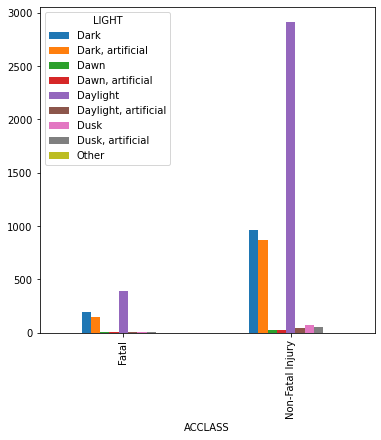

In [99]:
#Creating bar chart for LIGHT
df_light_noredlightcamera.pivot_table(index="ACCLASS",columns="LIGHT").plot(kind="bar",y="ACCNUM")

In [100]:
#Total number of accidents by Impact Type and Accident Classification WITHOUT Red Light Camera
df_impact_type_noredlightcamera=pd.DataFrame(area_without_redlightcameras.groupby(["IMPACTYPE"],as_index=False)["ACCNUM"].count())
df_impact_type_noredlightcamera

,IMPACTYPE,ACCNUM
0,Angle,262
1,Approaching,226
2,Cyclist Collisions,688
3,Other,66
4,Pedestrian Collisions,2568
5,Rear End,396
6,SMV Other,612
7,SMV Unattended Vehicle,62
8,Sideswipe,133
9,Turning Movement,726


<AxesSubplot:xlabel='IMPACTYPE'>

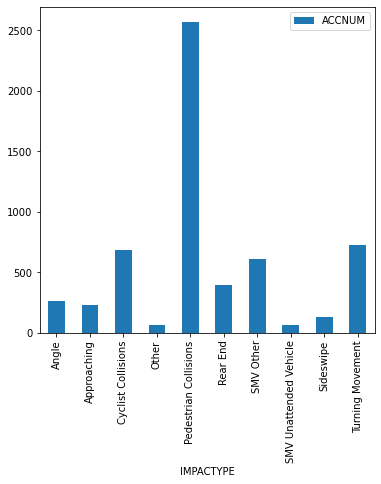

In [101]:
#Creating bar chart for IMPACT Type
df_impact_type_noredlightcamera.plot("IMPACTYPE","ACCNUM",kind="bar")

In [102]:
#Total number of accidents by Involvement Type WITHOUT Red Light Camera
df_involvement_type_noredlightcamera=pd.DataFrame(area_without_redlightcameras.groupby("INVTYPE",as_index=False)["ACCNUM"].count())
df_involvement_type_noredlightcamera

,INVTYPE,ACCNUM
0,Cyclist,162
1,Driver,3412
2,Driver - Not Hit,6
3,In-Line Skater,2
4,Moped Driver,12
5,Motorcycle Driver,337
6,Motorcycle Passenger,13
7,Other,40
8,Other Property Owner,24
9,Passenger,439


<AxesSubplot:xlabel='INVTYPE'>

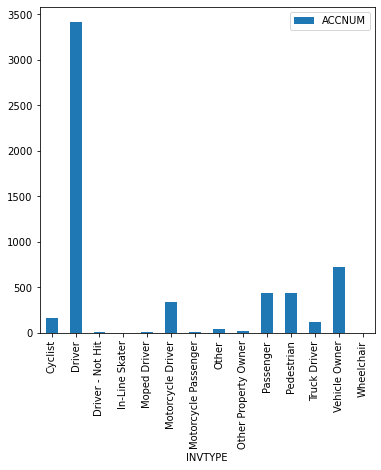

In [103]:
#Creating bar chart for Involvement Type
df_involvement_type_noredlightcamera.plot("INVTYPE","ACCNUM",kind="bar")

In [104]:
#Dropping just the columns with all NULL values in it and keeping rest of the columns
no_red_light_camera = area_without_redlightcameras.dropna(how='all')

no_red_light_camera =area_without_redlightcameras.dropna(how='all', axis=1)


In [105]:
no_red_light_camera['Month'] = no_red_light_camera['DATE'].dt.month_name()

C:\Users\aditis\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
no_red_light_camera.head()

,Longitude,Latitude,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,BIKE_PED_COLLISION,Day_of_Week,Month
0,-79.3771,43.7109,25301,Driver,75 to 79,1.0,"Automobile, Station Wagon",2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,1.0,Intersection,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,YES,Saturday,January
1,-79.3755,43.6595,26294,Pedestrian,65 to 69,2.0,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,YES,Saturday,January
2,-79.4336,43.6496,37330,Driver,50 to 54,1.0,"Automobile, Station Wagon",2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,3.0,Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,YES,Monday,January
3,-79.2974,43.7255,45664,Driver,50 to 54,5.0,"Automobile, Station Wagon",2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,NaN,Tuesday,January
4,-79.5755,43.7018,56815,Driver,45 to 49,1.0,Delivery Van,2020,2020-01-09,1100,11,MARTIN GROVE RD,BELFIELD RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,NaN,Thursday,January


# CREATING HEADMAP OF ACCIDENT DATA BY YEAR AND MONTH

In [107]:
def RTAs_by_month(df, month):
    month_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["Month"] == month and row["Day_of_Week"] == "Monday": mon +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Tuesday": tues +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Wednesday": wed +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Thursday": thurs +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Friday": fri +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Saturday": sat +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Sunday": sun +=1
        else: a=0 

    month_list.append(mon)
    month_list.append(tues)
    month_list.append(wed)
    month_list.append(thurs)
    month_list.append(fri)
    month_list.append(sat)
    month_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(month_list)

In [108]:
#Extract RTA data for each day by month
january = RTAs_by_month(no_red_light_camera, "January")
february = RTAs_by_month(no_red_light_camera, "February")
march = RTAs_by_month(no_red_light_camera, "March")
april = RTAs_by_month(no_red_light_camera, "April")
may = RTAs_by_month(no_red_light_camera, "May")
june = RTAs_by_month(no_red_light_camera, "June")
july = RTAs_by_month(no_red_light_camera, "July")
august = RTAs_by_month(no_red_light_camera, "August")
september = RTAs_by_month(no_red_light_camera, "September")
october = RTAs_by_month(no_red_light_camera, "October")
november = RTAs_by_month(no_red_light_camera, "November")
december = RTAs_by_month(no_red_light_camera, "December")

In [109]:
#Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data = np.array([january, february, march, april, may, june, july, august, september, october, november, december])
heatmap_df = pd.DataFrame(data=data, index=rows, columns=columns)

In [110]:
heatmap_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
January,53,75,53,52,78,51,51
February,50,50,51,53,47,54,45
March,55,52,71,51,65,53,45
April,56,61,60,48,55,53,42
May,57,75,74,75,68,64,59
June,66,94,86,92,77,76,77
July,84,66,80,70,91,56,68
August,65,85,65,83,106,89,64
September,79,90,88,79,87,81,84
October,86,75,91,83,88,68,63


Text(0.5, 1.0, 'Total Accidents WITHOUT RED LIGHT CAMERAS by week for each month from 2014-2020')

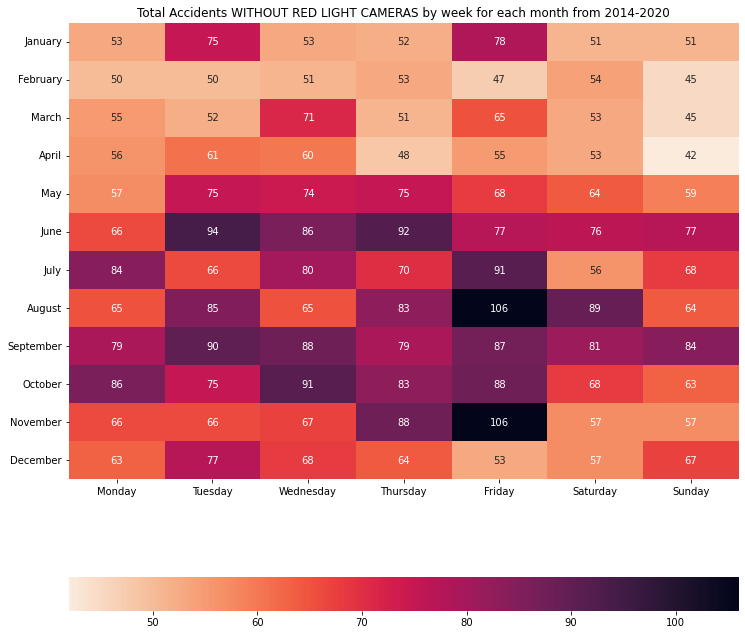

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
map1 = sns.heatmap(heatmap_df, annot=True, fmt="d", cmap='rocket_r', cbar_kws={"orientation": "horizontal"} )
map1.set_title("Total Accidents WITHOUT RED LIGHT CAMERAS by week for each month from 2014-2020")